In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from hydranerv.models.network.neuron import Neuron
from hydranerv.models.network.network import Network

In [4]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

In [5]:
N = 50
AMP_SIZE = 20
GC = 20
DENSITY = .3
TMAX = 600
T_REF = .1
WNOISE = 5000

In [6]:
def simulate(num_pacemakers, display=False):
    
    P = num_pacemakers
    
    # define edges
    edges = []
    np.random.seed(1)
    for i in range(N):
        for j in range(i+1, N):
            if np.random.rand() < DENSITY and (i, j) not in edges:
                edges.append((i, j))
    
    # add amplifier
    for i in range(0, AMP_SIZE//2):
        for j in range(i + 1, AMP_SIZE//2):
            if (i, j) not in edges:
                edges.append((i, j))
                
    for i in range(N-AMP_SIZE//2, N):
        for j in range(i + 1, N):
            if (i, j) not in edges:
                edges.append((i, j))

    # initiate network
    ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(P), conn_type='gap_junction', wnoise=WNOISE)
    
    if display:
        # display connection matrix
        ntwk.disp_conn_mat()
    
    # run simulation
    ntwk.run()
    
    # display result
    ntwk.disp(figsize=(10, 10), style='spike', dpi=100)
    
    # display single
    plt.figure(figsize=(15,3))
    plt.plot(ntwk.neurons[25].v_train, lw=.5)
    plt.show()

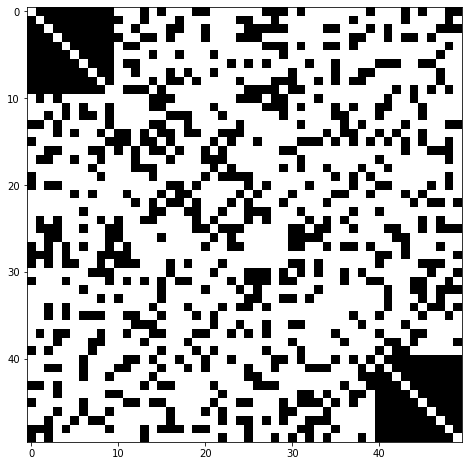

100%|██████████| 59999/59999 [01:41<00:00, 593.21it/s] 


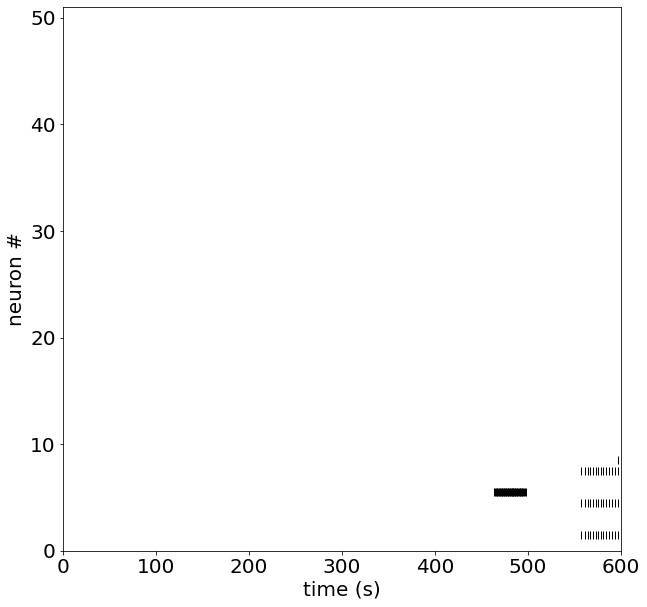

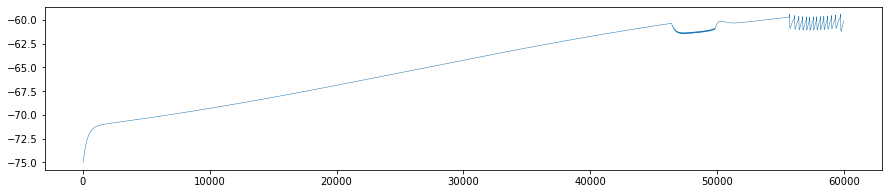

In [7]:
simulate(10, display=True)

100%|██████████| 59999/59999 [51:34<00:00, 19.39it/s]   


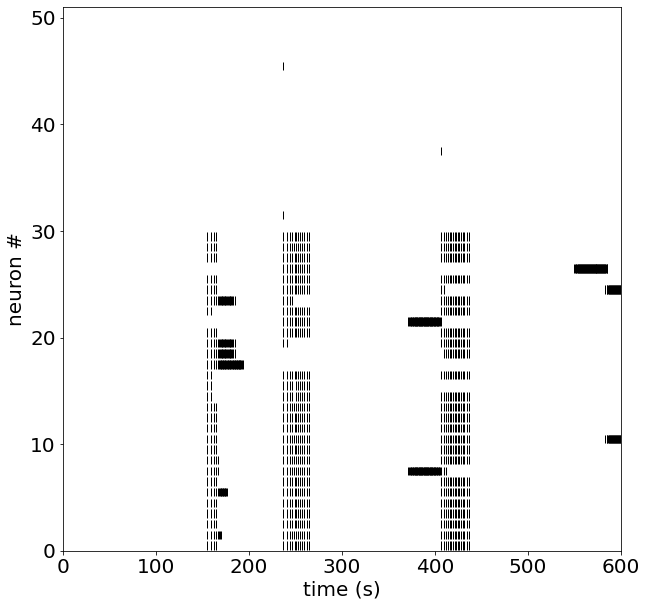

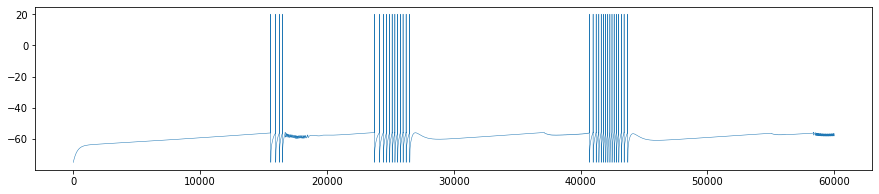

In [8]:
simulate(30)

100%|██████████| 59999/59999 [1:01:10<00:00, 16.35it/s] 


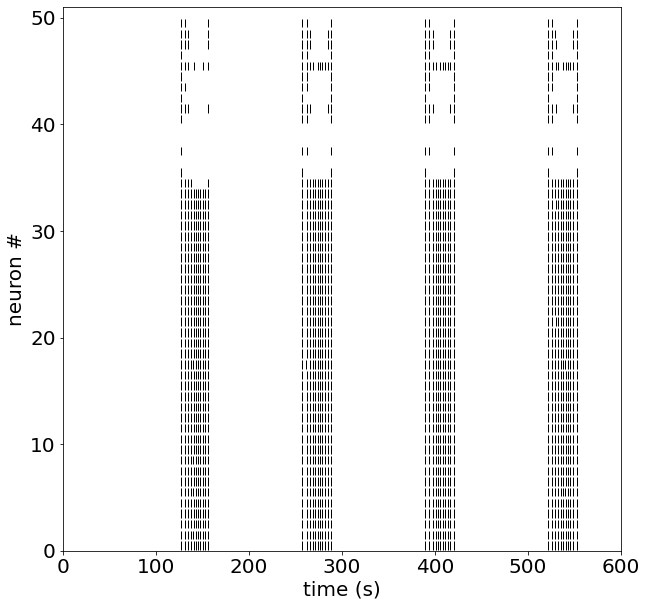

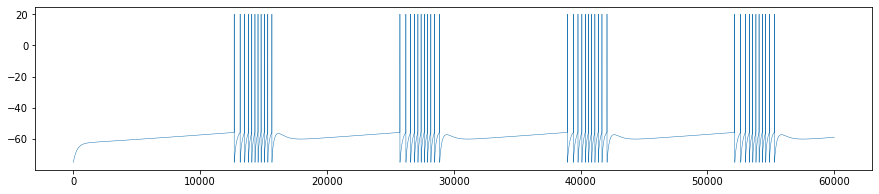

In [9]:
simulate(35)

100%|██████████| 59999/59999 [09:47<00:00, 102.07it/s] 


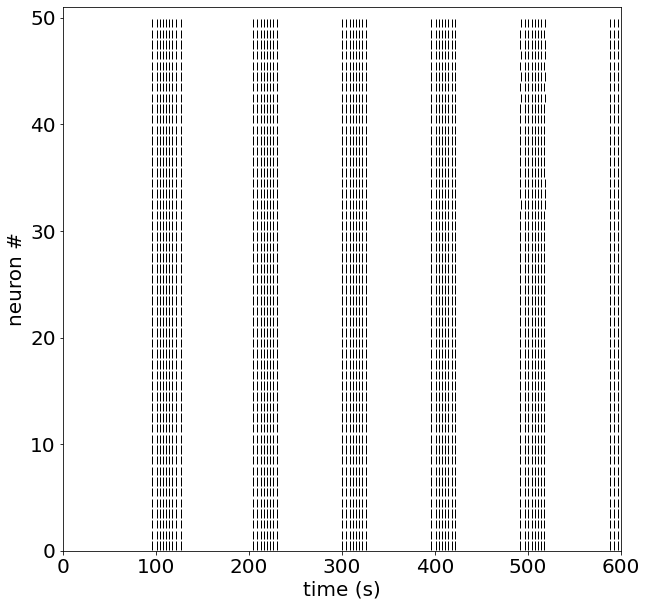

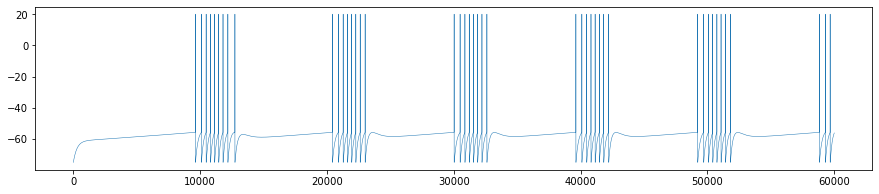

In [10]:
simulate(40)

100%|██████████| 59999/59999 [39:18<00:00, 25.44it/s]   


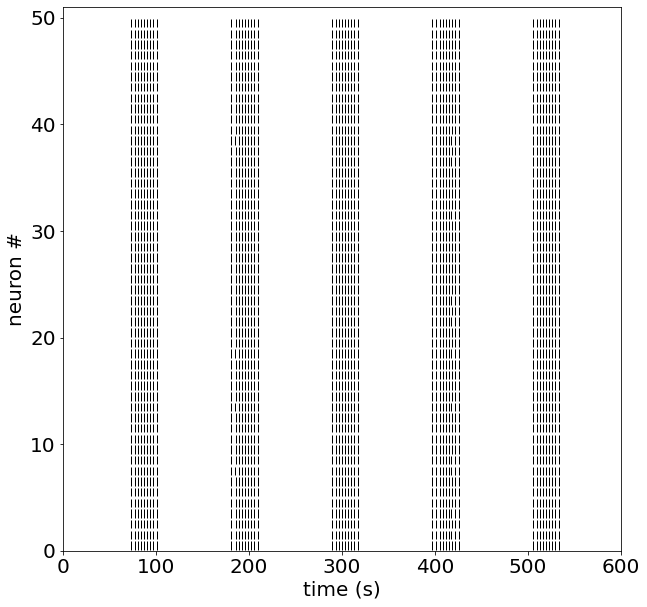

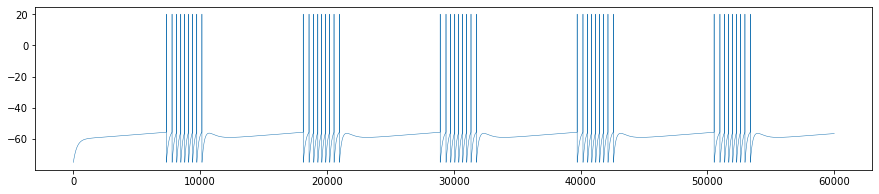

In [11]:
simulate(45)

100%|██████████| 59999/59999 [1:26:25<00:00, 11.57it/s]  


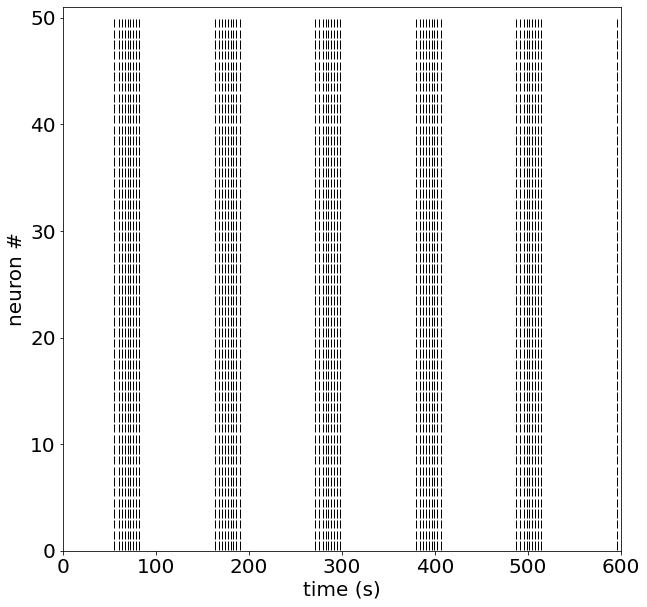

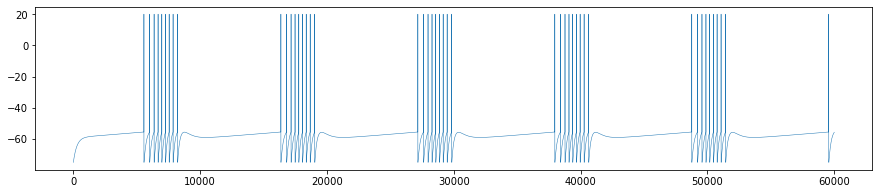

In [12]:
simulate(50)